# Trabalho Prático 01 - Parte 03: Smith-Waterman 

### Grupo:
* Alessandra Gomes Cioletti 2020730930
* Breno de Castro Pimenta 2017114809
* Daniel Victor Ferreira da Silva 2019006523
* Larissa Aline Fenandes Vieira 2019006868
* Vitor Pimentel dos Santos 2019021840


## Introdução
O algoritmo de Needleman-Wunsch é utilizado para a realização de alinhamentos globais par-a-par. Apesar de também ser um algoritmo para duas sequências, Smith-Waterman busca pelo melhor alinhamento local.
Neste notebook, iremos comparar os resultados obtidos ao implementar ambos os algoritmos citados anteriormente.

## Mudanças de Implementação para Smith-Waterman 

Devido a semelhança entre os algortimos foram realizadas poucas mudanças para a implementação do Smith-Waterman.

### Matriz:
Existem duas diferenças ao implementar a matriz, a primeira é que caso alguma célula tenha algum valor negativo o seu valor é alterado para zero e é retirado seu símbolo, mantendo apenas uma string vazia no lugar. A segunda diferença é que ao preencher a matriz a posição da célula com maior valor calculado é salvo e retornado.
<br>
<br>

### Alinhamento:
Ao realizar o alinhamento as diferenças se encontram na escolha das posições de início e término por ser alinhamento local. Ao invés do sumidouro, será utilizado a posição da célula com maior valor para iniciar o alinhamento e o algoritmo encontrará a parada ao se deparar com uma célula com valor zero.
<br>
<br>

### Visualização:
A visualização foi feita com o auxílio da biblioteca [dash-bio do plotly](https://dash.plotly.com/dash-bio), com o qual geramos como saída uma extensão html com a visualização dos alinhamentos por partes, da mesma forma que implementado para o Needleman-Wunsch.




# Código:

In [3]:
from IPython.display import Image
import pandas as pd
import numpy as np

In [2]:
!pip install dash
!pip install dash_bio

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 3.5MB 41.9MB/s 
     |████████████████████████████████| 194kB 42.3MB/s 
     |████████████████████████████████| 1.8MB 42.7MB/s 
     |████████████████████████████████| 358kB 29.6MB/s 
  Created wheel for dash: filename=dash-1.19.0-cp36-none-any.whl size=84013 sha256=db5a309b60ab45c28de4033e2f135aa7900c09ba2b028e311455845bfc703f4a
  Stored in directory: /root/.cache/pip/wheels/f7/50/a7/a230ff7f503b10120bff18c2524a375bb85a61ce6b519c8a77
  Created wheel for dash-renderer: filename=dash_renderer-1.9.0-cp36-none-any.whl size=1014869 sha256=6fd2025e3a6aba508ae0c9f079d0b01fe72ba8aff066554bb28d858a235037d0
  Stored in directory: /root/.cache/pip/wheels/46/a0/ec/2be2e8fc750e623d76f9690c397cc5ab28b33d0a16a49e10c5
  Created wheel for dash-core-components: filename=dash_core_components-1.15.0-cp36-none-any.whl size=3527014 sha256=1e81da665817d582a01bc

In [3]:
from requests import get

import dash
import dash_bio as dashbio
import dash_html_components as html

### Buscando blosum como arquivo local:

In [4]:
blosum = pd.read_csv('blosum62',delim_whitespace=True,skiprows=6)
blosum

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V,B,Z,X,*
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0,-2,-1,0,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3,3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3,4,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4
Q,-1,1,0,0,-3,5,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2,0,3,-1,-4
E,-1,0,0,2,-4,2,5,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-2,1,4,-1,-4
G,0,-2,0,-1,-3,-2,-2,6,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3,-1,-2,-1,-4
H,-2,0,1,-1,-3,0,0,-2,8,-3,-3,-1,-2,-1,-2,-1,-2,-2,2,-3,0,0,-1,-4
I,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-2,-1,-3,-1,3,-3,-3,-1,-4


### Lendo sequências dentro do arquivo fasta:

In [8]:
def read_seq(file):
    with open(file,'r') as fopen:
        sequencias = []
        cabecalho = []
        sequencia = ''
        for line in fopen:
            if(line[0] !='>'):
                sequencia = sequencia + line[:-1]
            else:
                cabecalho.append(line)
                sequencias.append(sequencia)
                sequencia = ''
        sequencias.append(sequencia)
    return sequencias[1:],cabecalho

def list_chars(sequencias):
    '''
    Adiciona asterisco no início de cada sequência
    '''
    for idx,val in enumerate(sequencias):
        sequencias[idx] = ['*']+list(val)
    return sequencias

### Gerando a matriz:

In [39]:
def matriz_SW(a,b,M,indel):
    max = 0
    if indel>0:
        M.iloc[0] = tuple(zip(np.zeros(len(b),dtype=int),[""]*len(b)))
        M["*"] = tuple(zip(np.zeros(len(a),dtype=int),[""]*len(a)))
    else:
        M.iloc[0] = tuple(zip(np.zeros(len(b),dtype=int),[""]*len(b)))
        M["*"] = tuple(zip(np.zeros(len(a),dtype=int),[""]*len(a)))
    for idxi in range(1,len(a)):
        for idxj in range(1,len(b)):
            diag = M.iloc[idxi-1].iloc[idxj-1][0]+ blosum[b[idxj]][a[idxi]]
            if a[idxi]!=b[idxj]:
                cima = M.iloc[idxi-1].iloc[idxj][0]-indel
                esq = M.iloc[idxi].iloc[idxj-1][0]-indel
                if diag>=cima:
                    if diag>=esq:
                        maior = diag
                        sinal = "\\"
                    else :
                        maior = esq
                        sinal = "_"
                elif cima>=esq:
                    maior = cima
                    sinal = "|"
                else:
                    maior = esq
                    sinal = "_"
            else:
                maior = diag
                sinal = "\\"
            if maior < 0:
                maior = 0
                sinal = ""
            if maior >= max:
                max = maior
                pos_max = (idxi,idxj)
            M.iloc[idxi].iloc[idxj] = (maior,sinal)
    return M, pos_max

### Gerando alinhamentos:

In [52]:
def alinhamentos_SW(a,b,M,pos):
    al_a = ""
    al_b = ""
    pos_linha = pos[0]
    pos_coluna = pos[1]
    valor, sinal = M.iloc[pos_linha].iloc[pos_coluna] # M.iloc[posicaolinha].iloc[posicaocoluna]
    while sinal!="":
        if sinal == '\\':
            al_a = a[pos_linha] + al_a
            al_b = b[pos_coluna] + al_b
            pos_linha = pos_linha -1
            pos_coluna = pos_coluna -1
        elif sinal == '|':
            al_a = a[pos_linha] + al_a
            al_b = "-" + al_b
            pos_linha = pos_linha - 1
        elif sinal == '_':
            al_a = "-" + al_a
            al_b = b[pos_coluna] + al_b
            pos_coluna = pos_coluna -1
        valor, sinal = M.iloc[pos_linha].iloc[pos_coluna]
    return al_a,al_b

### Escreve os alinhamentos no arquivo fasta:

In [8]:
def write_alinhamentos(file,alms,cabecalho):
    '''
    Escreve os alinhamentos resultantes
    no arquivo fasta.
    '''
    arquivo = open(file, 'w')
    for pos,alm in enumerate(alms):
        arquivo.write(cabecalho[pos])
        ls = np.arange(0,len(alm)+1,60)
        i = 0
    for f in ls[1:]:
        arquivo.write(alm[i:f]+"\n")
        i = f
    arquivo.write(alm[i:]+"\n")
    arquivo.close()

### Gera visualização do alinhamento:

In [47]:
def plot(file):
    plot = dash.Dash()

    data = open(file, 'r').read()

    plot.layout = html.Div([
      dashbio.AlignmentChart(
          id='my-alignment-viewer',
          data=data,
          showconsensus=False,
          textsize = 14,
          height = 550,
          tilewidth = 20,
      ),
      html.Div(id='alignment-viewer-output')
    ])

    @plot.callback(
      dash.dependencies.Output('alignment-viewer-output', 'children'),
      [dash.dependencies.Input('my-alignment-viewer', 'eventDatum')]
    )
    def update_output(value):
        if value is None:
            return 'No data.'
        return str(value)


    plot.run_server(host = 'localhost',debug=False)

## Exemplos da descrição do TP:

In [14]:
#Examplo 01

A = "DRQT"
B = "DRQT"
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,0)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
print(alinhamento[0])
print(alinhamento[1])
print()
matriz

       *       D        R        Q        T
*  (0, )   (0, )    (0, )    (0, )    (0, )
D  (0, )  (6, \)   (6, _)   (6, _)   (6, _)
R  (0, )  (6, |)  (11, \)  (11, _)  (11, _)
Q  (0, )  (6, |)  (11, |)  (16, \)  (16, _)
T  (0, )  (6, |)  (11, |)  (16, |)  (21, \)

DRQT
DRQT


In [15]:
#Examplo 02

A = "DRQT"
B = "DRET"
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,0)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
print(alinhamento[0])
print(alinhamento[1])
print()
matriz

       *       D        R        E        T
*  (0, )   (0, )    (0, )    (0, )    (0, )
D  (0, )  (6, \)   (6, _)   (6, _)   (6, _)
R  (0, )  (6, |)  (11, \)  (11, _)  (11, _)
Q  (0, )  (6, |)  (11, |)  (13, \)  (13, _)
T  (0, )  (6, |)  (11, |)  (13, |)  (18, \)

DRQT
DRET


In [60]:
#Examplo 03

A = "DRQTAQAAGTTTIT"
B = "DRNTAQLLGTDTT"
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,0)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
print(alinhamento[0])
print(alinhamento[1])
print()
matriz

DRQTAQ--AAGT-TTIT
DRNTAQLL--GTD-T-T



,*,D,R,N,T,A,Q,L,L,G,T,D,T,T
*,"(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )","(0, )"
D,"(0, )","(6, \)","(6, _)","(6, _)","(6, _)","(6, _)","(6, _)","(6, _)","(6, _)","(6, _)","(6, _)","(6, \)","(6, _)","(6, _)"
R,"(0, )","(6, |)","(11, \)","(11, _)","(11, _)","(11, _)","(11, _)","(11, _)","(11, _)","(11, _)","(11, _)","(11, _)","(11, _)","(11, _)"
Q,"(0, )","(6, |)","(11, |)","(11, \)","(11, |)","(11, |)","(16, \)","(16, _)","(16, _)","(16, _)","(16, _)","(16, _)","(16, _)","(16, _)"
T,"(0, )","(6, |)","(11, |)","(11, \)","(16, \)","(16, _)","(16, |)","(16, |)","(16, |)","(16, |)","(21, \)","(21, _)","(21, \)","(21, \)"
A,"(0, )","(6, |)","(11, |)","(11, |)","(16, |)","(20, \)","(20, _)","(20, _)","(20, _)","(20, _)","(21, |)","(21, |)","(21, \)","(21, \)"
Q,"(0, )","(6, |)","(11, |)","(11, \)","(16, |)","(20, |)","(25, \)","(25, _)","(25, _)","(25, _)","(25, _)","(25, _)","(25, _)","(25, _)"
A,"(0, )","(6, |)","(11, |)","(11, |)","(16, |)","(20, \)","(25, |)","(25, |)","(25, |)","(25, \)","(25, \)","(25, |)","(25, \)","(25, \)"
A,"(0, )","(6, |)","(11, |)","(11, |)","(16, |)","(20, \)","(25, |)","(25, |)","(25, |)","(25, \)","(25, \)","(25, |)","(25, \)","(25, \)"
G,"(0, )","(6, |)","(11, |)","(11, \)","(16, |)","(20, |)","(25, |)","(25, |)","(25, |)","(31, \)","(31, _)","(31, _)","(31, _)","(31, _)"


## Exemplos utilizando sequências do arquivo de entrada:
Decidimos usar como sequência base para os alinhamentos a terceira sequência do arquivo referente ao SARS2. 

Lendo sequências do arquivo fasta:





In [18]:
sequencias,cabecalho = read_seq('sequencias_spike.fasta')
sequencias = list_chars(sequencias)

O primeiro exemplo é o alinhamento da SARS2 com CVMJC (Murine coronavirus), utilizando o indel = 5:

In [10]:
A = sequencias[0]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,5)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
write_alinhamentos('alinhamentosSW02.fasta',alinhamento,[cabecalho[0],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

LFVFILFLPSCLGYIGDFRCIQTVNYNGNNASAPSISTEAVDVSKGLGTYYVLDRVYLNATLLLT-G-YYP-VDGSN-YRNLALTGTNTLSLTWFKPPFLSEFNDGI-FAKVQNLKTNTPTGATSYFPTIVIGSLFGNTSYTVVLEPYNNIIMASVCTYTICQLPYTPC---KPN-T--NGN-RVIGFW-H-T-D-VKPPICL-L--KR-NF-TF-N-V--NAPWLYFHFYQQGGTFYAYYADKP---SATTFLFSVYIG-DILT-Q-YFVL-PFICTP---TAGSTL-LPLYWVTPLLKRQYLFNFNEKGVITSAVDCASSYISEIKCKTQSLLPSTGVYDLSGYTVQPVGVVYRRVPNLPD-CKIEEWLTAKSVPSPLNWERRTFQNCNFNLSSLLRYVQAESLSCNNIDASKVYGMCFGSVSVDKFAIPRSRQIDLQIGNSGFLQTANYKIDTAATSCQLYYSLPKNNVTINNYNPSSWNRRYGFNDAGVFGKSKHDVAYAQQCFIVRPSYCPCAQPDIVSACTSQTKPMSAYCPTGTIHRECSLWNGPHLRSARVGSGTYTCECTCKPNPFDTYDLRCGQIKTIVNVGDHCEGLGVLEDKCGNSDPHKGCSCAHDSFIGWSHDTCLVNDHSQIFANILLNGINSGTTCSTDLQLPNTEVATGVCVRYDLYGITGQGVFKEVKADYYNSWQAL-LYDVNG-NLNGFRDLTTNKTYTIRSCYSGRVSAAYHK-EAPE-PALLYRNINCSYVFTNNISREENPLNYFDSYLGCVVNADNRPDEALPNCDLRMGAGLCVDY-SKSRRARRSVSTGYRLTTFEPY-MPMLVNDSVQSVGGLYEMQIPTNFTIGHHEEFIQIRAPKVTIDCAAFVCGDNAACRQQLVEYGSFCDNVNAILNEVNNLLD-NMQLQVASALMQGVTISSRLPDGISGPIDDINFSPLLGCIGSTCAEDGNGPSAMRGRSAIEDLLFDKVKLSDVGFVEAYNNCTGGQEVRDLLC

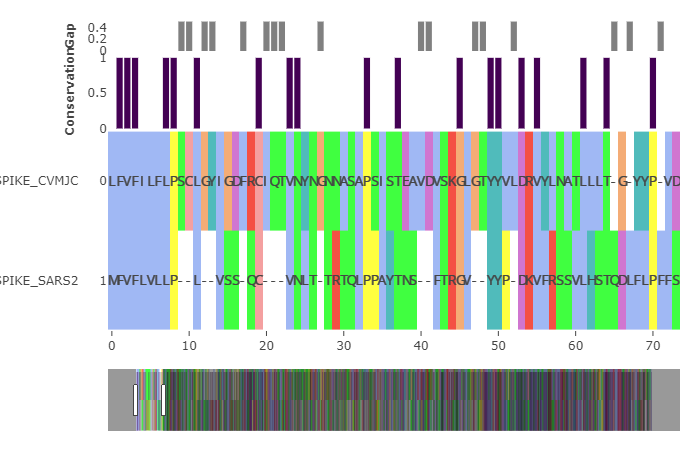

In [5]:
#plot('alinhamentosSW02.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (5).png")  # amostra da visualização

O segundo exemplo é o alinhamento da SARS2 com MERS (Middle East respiratory syndrome-related coronavirus), utilizando o indel = 0:

In [12]:
A = sequencias[1]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,0)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
write_alinhamentos('alinhamentosSW12.fasta',alinhamento,[cabecalho[1],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

MIHSVFLLMFLLTPTESYVDVGPDSVKS-ACIEVDI-QQTFFDKT--WPRP---IDVS--KADGI-IYP-Q--GRTYSNITI--TYQ-GLF-P-YQGD----HGDMYVYSAGHAT-GT----TP-QKL-FVANYSQD-V-KQFA-----NGFVVR--I-GAAANSTGTVI-ISPST-SATIRKIYPAFMLGSSVGNFSDGKMGRFFN-HT-LVL-LPDGCGTLLRAF-YCILEPRSGN-HCP--AG-NSYTSFATYHTPATDCSDGNYNRNAS-LNS-FK-EY---FNLRNCTF-MY-T--YNI-TEDEILEWFGITQTAQGVHLF-S-SR-YV----D----LY------GGN----M-FQ-F-ATL-P-VYD-------TIKY-YS-I-IPHSIRS-IQS--D-RKA-W----AAFYV-YKLQP-LTFLL-DFSVD-G-YI--RRAIDCGFND-LSQ--LHCS-YESF-DVESGVY-SVSSF--EAKPS-GSVVEQ--AEGV---ECDFSPLLSG-----TPPQ---VY--N-FKRLVFTNC--NYNLTKLLS-LFSVN--DF-T--C-SQISP--AAIASN--CYSSLILDY--FSYPLSMKSD-L-SVSSAGP-----ISQFNYKQSFSNP---T-CLILA--TVPHNL-TTITKPL--KYS--Y-I----N-K--CSRLLSD-DRTEV-PQLVNANQYS-PCVSIVPSTVWEDG-D-YYRKQLSPLE--G-----G-G---W-LVASGSTVAMT-EQLQMGFGITVQY--GTDTNSVC-PKLEFA-N-DTKIASQLGN-CVEYSLY-GVSG-RGV--FQ-N-CTAVGVR----QQRF---V----YDA----YQNL-V-GYYSDDGNYYCL--RACVS---VPVSVIYDKET--KTHATLFGS--VA-------C-E-----H---ISST-MSQYSRST-RSM-LKRRDSTYG--PL-QT-PVGCVL-G---LVNSSLFVEDC-KLPLGQS-LCA

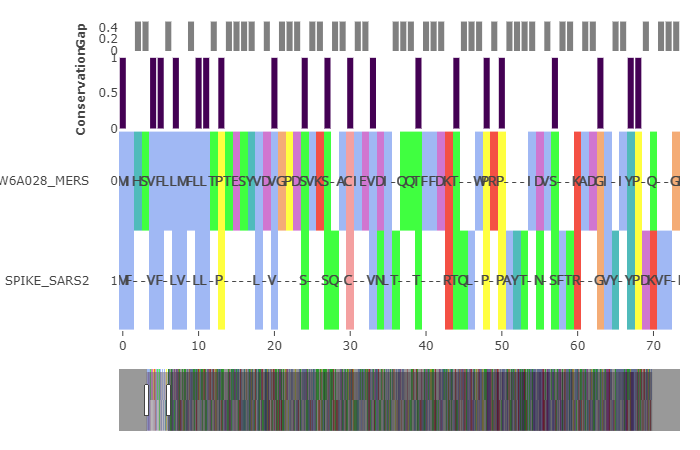

In [4]:
#plot('alinhamentosSW12.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (6).png") # amostra da visualização

O terceiro exemplo é o alinhamento da SARS2 com SARS (Severe acute respiratory syndrome coronavirus), utilizando o indel = 5:

In [14]:
A = sequencias[3]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,5)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
write_alinhamentos('alinhamentosSW32.fasta',alinhamento,[cabecalho[3],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTI-----NHT--FGNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNSTNVVIRACNFELCDNPFFAV--SK-PMG-TQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAILT---AF-SPA-QDI-WGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCT-PPALNCYWPLNDYGFYTTTGIGYQPYRVVVLSFELLNAPATVCGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFGRDVSDFTDSVRDPKTSEILDISPCSFGGVSVITPGTNASSEVAVLYQDVNCTDVSTAIHADQLTPAWRIYSTGNNVFQTQAGCLIGAEHVDTSYECDIPIGAGICASYHT-V-S--LLRSTSQKSIVAYTMSLGADSSIAYSNNTIAIPTNFSISITTEVMPVSMAKTSVDCNMYICGDSTECANLLLQYGSFCTQLNRALSGIAAEQDRNTREVFAQVKQMYKTPTLKYFGGFNFSQILPDPLKPTKRSFIEDLLFNKVTLADAGFMKQYGECLGDINARDLICAQKFNGLTVLPPLLTDDMIAAYTAALVSGTATAGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKQIANQFNKAISQIQESLTTTSTALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRL

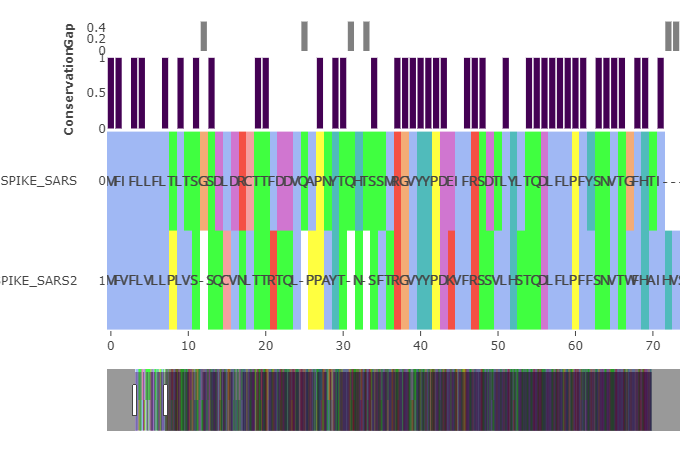

In [6]:
#plot('alinhamentosSW32.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (7).png") # amostra da visualização

O quarto exemplo é o alinhamento da SARS2 com CVHOC (Human coronavirus OC43), utilizando o indel = 5:

In [17]:
A = sequencias[6]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,5)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
write_alinhamentos('alinhamentosSW62.fasta',alinhamento,[cabecalho[6],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

MFLILLISLPTAFAVIGDLKCTSDNINDKDTGPPPISTDTVDVTNGLGTYYVLDRVYLNTTLF-LNG-YYP-TSGST-YRNMALKGSVLLSRLWFKPPFLSDFINGI-FAKVKNTKVIKDRVMYSEFPAITIGSTFVNTSYSVVVQPRTINSTQD---G----DNKLQGL-LEVSV-CQYNMCEYPQTICHPNLGN-HRKELWHLDTGVVSCLYKRNFT-Y-DVNADYLYFHFYQE-GGTFYAY--FTD--TGV-VTKFLFNVYLGMALSHYYVMPLTCNSKLT---LEYWVTPLTSRQYLLAFNQDGIIFNAEDCMSDFMSEIKCKTQSIAPPTGVYELNGYTVQPIADVYRRKPNLPN-CNI-EAWLNDKSVPSPLNWERKTFSNCNFNMSSLMSFIQADSFTCNNIDAAKIYGMCFSSITIDKFAIPNGRKV-DLQLGNLGYLQSFNYRIDTTATSCQLYYNLPAANVSVSRFNPSTWNKRFGFIEDSVFKPRPAGVLTNHDVVYAQHCFKAPKNF-CPCKLNGSCVGSGPGKNNGIGTCPAGTNYLTCDNLCTPDPITFTGTYKCPQTKSLVGIGEHCSGLAVKSDYCGGNSCTCRPQAFLGWSADSCLQGDKCNIFANFILHDVNSGLTCSTD-LQKANTDIILGVCVNYDLYGILGQGIFVEVNATYYNSWQNLLYDSNGNLYGFRDYIINRTFMIRSCYSGRVSAAFHANSSEPALLFRNIKCNYVFNNSLTRQLQPINYFDSYLGCVVNAYNSTAISVQTCDLTVGSGYCVDYSKNRRS-RGAITTGYRFTNFEPFTVN-SVNDSLEPVGGLYEIQIPSEFTIGNMVEFIQTSSPKVTIDCAAFVCGDYAACKSQLVEYGSFCDNINAILTEVNELLD-TTQLQVANSLMNGVTLSTKLKDGVNFNVDDINFSPVLGCLGSECSKASSRSAIEDLLFDKVKLSDVGFVEAYNNCTGGAEIRDLICVQSYKGIKVLPPLLSENQISGYTLAAT

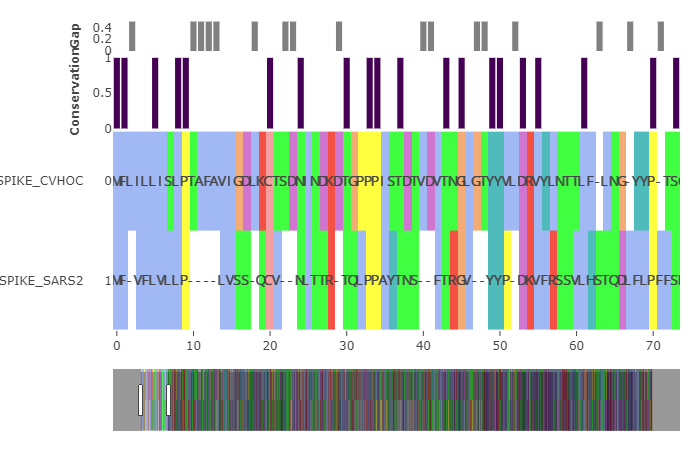

In [15]:
#plot('alinhamentosSW62.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (8).png") # amostra da visualização

## Comparação entre os algoritmos:
#### - Objetivo:
O objetivo de gerar esse exemplo foi devido a inconclusividade ao analizarmos os alinhamentos utilizando os arquivos de entrada. Partimos da hipótese que deve-se às similaridades tanto de aminoácidos quanto do tamanho das sequências. 
<br>
Dessa forma selecionamos duas partes das sequências analizadas com tamanhos e aminoácidos diferentes, para demonstrar de forma mais clara a diferença entre os algoritmos e também as vantagens que podem existir ao optar-se por um método de alinhamento local.

In [57]:
A = "NFNEKGVITSAVDC"
B = "AAAYYVGYLQPRTFLLKYNENGT"
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,5)
alinhamento = alinhamentos_SW(A,B,matriz,pos)
pd.set_option('display.max_rows', None)
#print(alinhamento)
#matriz


Utilizando das sequências A e B como apresentado na célula acima geramos os seguintes alinhamentos com suas respectivas matrizes:

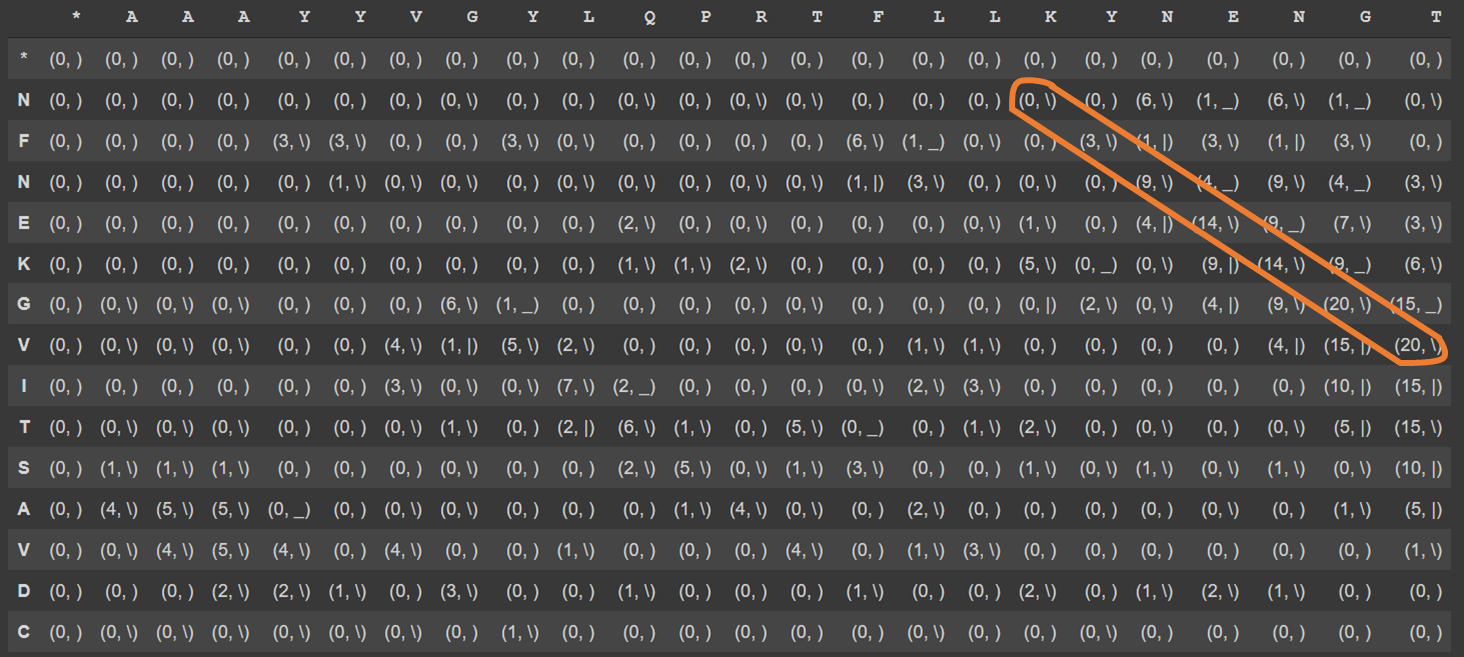

In [58]:
# Smith-Waterman:
Image('SW_alinhamento.png')

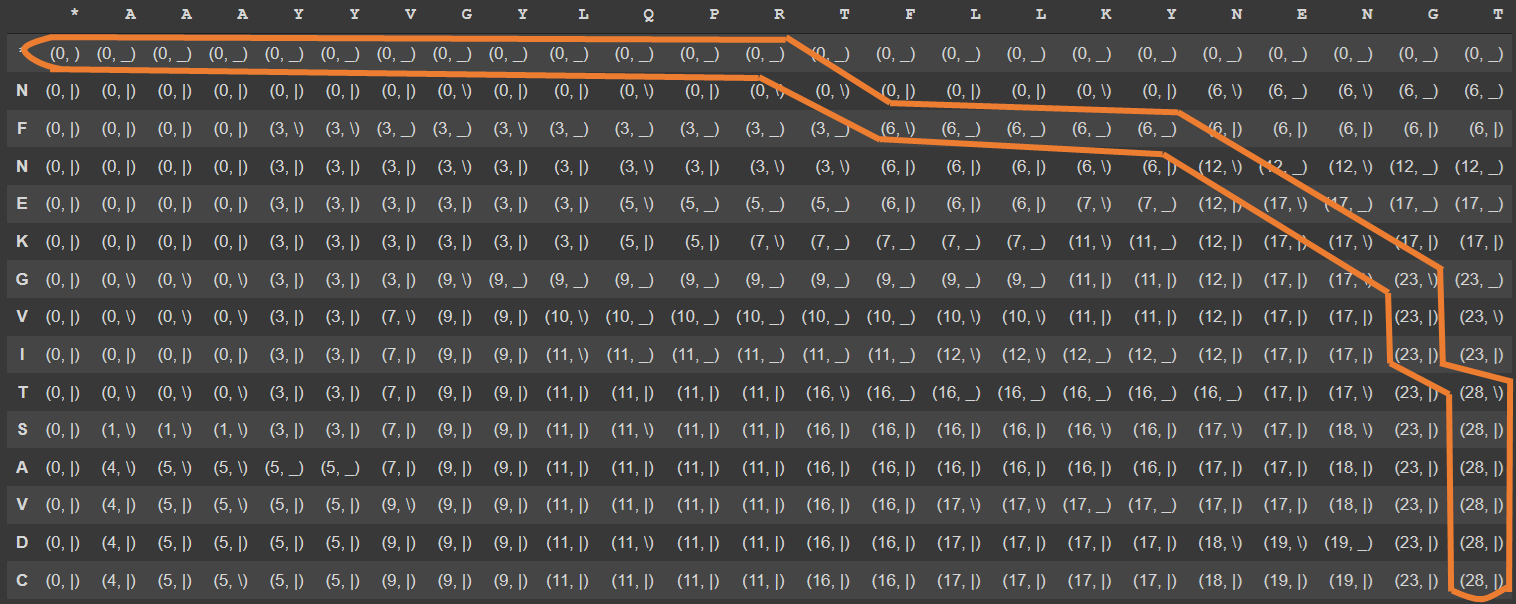

In [59]:
# Needleman-Wunsch:
Image('NW_alinhamento.png')

#### - Conclusão:
É visível a diferença dos alinhamentos e suas respectivas matrizes entre os algoritmos. <br>
Dentro dessa diferença é notório a importância de alinhamentos locais como Smith-Waterman, que apesar de gerar um alinhamento menor, pode ter um resultado mais conciso diante de uma resposta maior e com alto número de gaps como é o caso do Needleman-Wunch no exemplo acima.



---
<br>

# Para teste do avaliador:


In [ ]:
# ENTRAR VALORES PARA REALIZAR O ALINHAMENTO:
nome_arquivo_origem = ""
nome_arquivo_resultado = ""
indel = 0

#chamada das funções:
sequencias,cabecalho = read_seq(nome_arquivo_origem)
sequencias = list_chars(sequencias)
A = sequencias[0]
B = sequencias[1]
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz, pos = matriz_SW(A,B,M,indel)
alms = alinhamentos_SW(A,B,matriz,pos)
cabecalhos = [cabecalho[0],cabecalho[1]]

#Armazenando arquivo resultado
write_alinhamentos(nome_arquivo_resultado,alms,cabecalhos)

#Plotando arquivo resultado
plot(nome_arquivo_resultado)